# Función de onda de Monte Carlo
## Evolucion dinamica de la funcion de onda.

Mientras que el formalizmo de la matriz de densidad describe el promedio del conjunto de muchas trayectorias identicas de un sistema cuantico, la función de onda de Monte Carlo (MC), o enfoque de salto cuántico para la evolución de onda, permite simular una trayectoria individual de la dinamica del sistema.

Aqui el entorno se controla continuamente, lo qeu da lugar a una serie de saltos cuánticos en la funcion de onda del sistema, condicionados al aumento de la información obtenida sobre el estado del sistema a travéz de las mediciones. En general, esta evolución se rige por la ecuación de Schrodinger con un hamiltoniano efectivo no hermitiano.

$  H_{\text{eff}} = H_{\text{sys}} - \frac{i \hbar}{2} \sum C_n^+ C_n $ (1)

Donde de nuevo, Cn son operadores de colapso, cada uno correspondiente a procesos irreversibles separados con un tasa $\gamma _n$ . Aqui, la porsion no hermitiana estrictamente negativa de la ecuacion (1) da lugar a una reducción en al norma de la función de onda, que a primer orden en un tiempo pequeño $ \delta t $ esta dado por 
$ \langle \psi(t+\delta t) | \psi(t+\delta t) \rangle = 1 - \delta p $ donde

$ \delta p = \delta t \sum_n \langle \psi(t) | C_n^+ C_n | \psi(t) \rangle $ (2)

y $\delta t$ es tal que $\delta p << 1$. Con la probabilidad de permanecer en el estado $ | \psi(t + \delta t) \rangle $ dado por $ 1 - \delta p$ La probabilidad de un salto cuantico correspondiente es por lo tanto Eq.(2). Si las mediciones registran un salto cuantico, a tra vez de la emisión de un foton, o el cambio del espin de un punto cuantico, la funcion de onda sufre un salto de estado proyectado a $ | \psi(t) \rangle $ usando el operador de Colapso $C_n$ correspondiente con la medición. 

$ \psi(t+\delta t)\rangle = \frac{C_n |\psi(t)\rangle}{\langle \psi(t) | C_n^+ C_n | \psi(t) \rangle^{1/2}} $ (3)

Si mas de un operador de colapso esta presente en la Eq.(1) la probabilidad de un colapso dado el $ith$-operator $C_i$ esta dado por: 

$P_i(t) = \frac{\langle \psi(t) | C_i^+ C_i | \psi(t) \rangle}{\delta p}$ (4)

Evaluar la evolución MC de primer orden para el tiempo es tedioso. En vez de eso, QuTip usa el siguiente algoritmo para simualr una sola trayectoria de un sistema cuantico. Empezando desde un estado puro $ | \psi(0) \rangle $

Ia: Escoje un número aleatorio $r_1$ entre cero y uno, representando la probabilidad de que el salto cuántico ocurra. 

Ib: Escoje un núero aleatorio $r_2$ entre cero y uno, para seleccionar el cual operador fue el responsable del salto

II: Se integra la eq de Scrodinger, usando el Hamiltoniano efectivo (1) hasta un tiempo $ τ $ tal que la norma de la funcion de onda satisface $\langle \psi(\tau) | \psi(\tau) \rangle = r_1$ hasta el punto en el que ocurre el salto cuántico.

III: El resultado resultante del salto proyecta al sistema a uno de sus estados renormalizados dados por la Eq.(3). El correspondiente operador de colapso $C_n$ se elije de modo que $n$ se a el valor entero mas pequeño que satisfaga: 



$\sum_{i=1}^{n} P_n(\tau) \geq r_2$ (5)

Donde los $P_n$ individuales estan dados por la Eq.(4). Nota que la parte izquieda de la Eq.(5). es por definción, normalizado a la unidad.

IV: Usando el estado renormalizado del paso III como una nueva codicion inicial para el tiempo $\tau$ busca un nuevo numero aleatorio, y repite el procedimiento hasta que el tiempo de la simulación este terminado

# Monte Carlo en Qutip 
En QuTip, la funcion de evolución de Monte Carlo esta implementado en la función qutip.mcsolve . Toma casi los mismos argumentos que la función qutip.mesolve para resolver la ecuación maestra, expecto que el estado incial tiene que ser un vector ket,que es lo opuesto para la matriz de densidad, y adamas hay un parametro opcional llamado ntraj, que define el numero de trajectorias estocasticas que seran simuladas. Por defecto, ntraj = 500 indicando que 500 trayectorias de Monte Carlo seran realizadas.

Para ilustrar el uso de la evolucion de onda de montecarlo en QuTip, consideremos el caso de un átomo de dos niveles acoplado a una cavidad con fugas. la unica diferencia entre el la solución. la diferencia entre usar el metodo de MC y el de la ecuación maestra en qutip es que invocamos qutip.mcsolve en vez de qutip.mesolve

In [7]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

10.0%. Run time:   3.59s. Est. time left: 00:00:00:32
20.0%. Run time:   7.28s. Est. time left: 00:00:00:29
30.0%. Run time:  10.95s. Est. time left: 00:00:00:25
40.0%. Run time:  14.73s. Est. time left: 00:00:00:22
50.0%. Run time:  18.47s. Est. time left: 00:00:00:18
60.0%. Run time:  22.01s. Est. time left: 00:00:00:14
70.0%. Run time:  25.61s. Est. time left: 00:00:00:10
80.0%. Run time:  29.34s. Est. time left: 00:00:00:07
90.0%. Run time:  33.02s. Est. time left: 00:00:00:03
100.0%. Run time:  36.47s. Est. time left: 00:00:00:00
Total run time:  36.52s


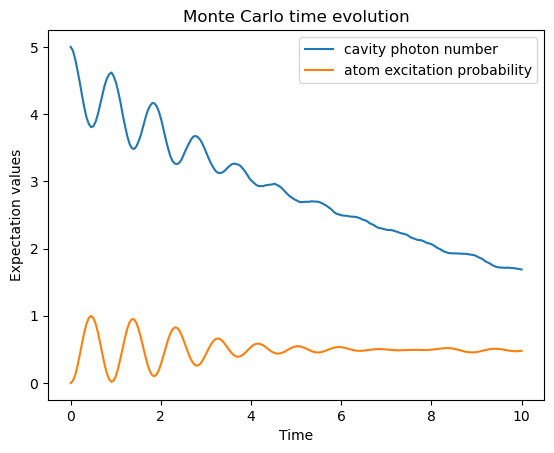

In [8]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))
H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.25*(sm*a.dag() + sm.dag()*a)
data = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])

plt.figure()
plt.plot(times, data.expect[0], times, data.expect[1])
plt.title('Monte Carlo ')
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()

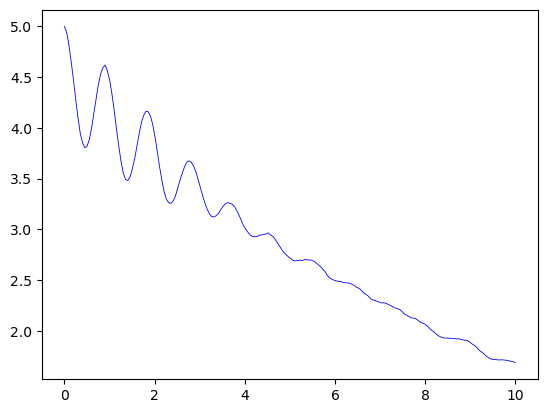

In [17]:
plt.plot(times,data.expect[0], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'blue')